In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Loading the preditions of the model and merge them together

In [2]:
rfr = pd.read_parquet("../data/curated/rfr_prediction")
glm = pd.read_parquet("../data/curated/glm_prediction")

In [19]:
# Merge the 2 predictions dataframe together
df = rfr.merge(glm, on="month", how='left')
df = df.drop("actual_total_trips_x", axis = 1)

# Correct the order of the months
index_order = [0,2,1]
df = df.reindex(index_order)
month_name = {3: "Mar 2024", 4: "Apr 2024", 5: "May 2024"}
df["month"] = df["month"].replace(month_name)



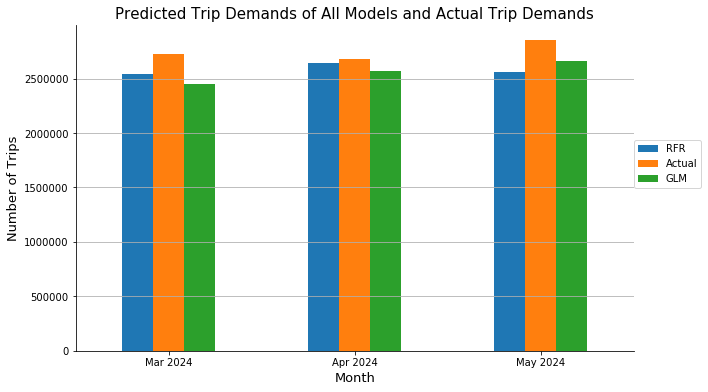

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))  # width, height in inches

# Plotting the bar chart
df.set_index('month').plot(kind='bar', ax=ax)

# Customize the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Rename the legends and add grid for better visualisation
ax.legend(['RFR', 'Actual', 'GLM'], loc=(1,0.5))
ax.yaxis.grid(True)

# Add labels and title
plt.xlabel('Month',fontsize=13)
plt.ylabel('Number of Trips',fontsize=13)
plt.title('Predicted Trip Demands of All Models and Actual Trip Demands', fontsize=15)
plt.xticks(rotation=0)

# Show the plot
plt.savefig("../plots/PredictionResult")
plt.show()